In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics
import numpy as np

In [22]:
1.#获取数据
data=load_breast_cancer()
X=data.data
y=data.target

In [23]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [25]:
df['target']=data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [26]:
#2.数据集划分
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33,random_state=0)

In [27]:
#特征工程
transfer =StandardScaler()#实例化一个转换器
x_train=transfer.fit_transform(x_train)
x_test=transfer.fit_transform(x_test)
print(x_test)

[[-0.14478411  0.24396716 -0.07321931 ...  1.45249502  1.18405306
   1.50386893]
 [-0.20209576  1.29704886 -0.27102942 ... -0.78390307 -0.82754864
  -0.9216493 ]
 [ 0.04223284 -0.83805758 -0.03182733 ... -0.44300847 -1.37055769
  -0.96562662]
 ...
 [-1.01652443  0.81614897 -1.02262069 ... -1.22794489 -1.2101232
  -0.92785123]
 [ 0.26544663 -1.04288531  0.19822495 ...  0.21904554  0.34485726
  -0.13287664]
 [-0.40419473 -0.69111595 -0.39520537 ... -0.41294314  0.42595601
  -0.49879048]]


In [28]:
estimator = LR()
es=estimator.fit(x_train,y_train)

In [29]:
#模型评估
y_pre=es.predict(x_test)
print('预测值是',y_pre)
score=es.score(x_test,y_test)
print('准确率是',score)

预测值是 [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1]
准确率是 0.9521276595744681


In [30]:
#其他评估
#混淆矩阵
metrics.confusion_matrix(y_test,y_pre)

array([[ 65,   2],
       [  7, 114]])

In [31]:
#精确率和召回率
ret=metrics.classification_report(y_test,y_pre,target_names=('良性','恶性'))
print(ret)

              precision    recall  f1-score   support

          良性       0.90      0.97      0.94        67
          恶性       0.98      0.94      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



In [32]:
metrics.precision_score(y_test,y_pre)

0.9827586206896551

In [33]:
metrics.recall_score(y_test,y_pre)

0.9421487603305785

In [34]:
area=metrics.roc_auc_score(y_test,y_pre)

In [35]:
area
estimator.decision_function(x_test)

array([ -7.28841237,   3.24539936,   6.4208348 ,   4.27244216,
         8.27204205,   4.98424266,   8.91489307,   6.33923563,
         9.27289524,  12.53856998,  -0.06842746,   1.85967803,
        11.56039056,  -1.0942226 ,  -0.99231469,  -6.43169651,
         4.59113621, -13.93836574, -11.14766825, -22.62690459,
        -7.51866154,  -4.46244939,   3.72564369,   6.66481644,
        -8.28768561,   6.98041048,   9.55004034,  -3.79635079,
         6.33615255, -14.95433752,   9.42919562, -11.51850182,
         1.54999753,  -6.62350118,  12.22739354,  -6.75882828,
         3.43260111,  -9.5185097 ,   4.25258743,  -9.03148294,
        -3.5029739 ,   8.44177307,  -3.20690626,   9.40065187,
         1.96041133, -23.81672649,  13.74951685,   3.96416827,
         7.24606049,  -9.93590863, -14.93175126,  -2.22378999,
       -11.59778684,   6.40908531,   5.46924407,   7.34791308,
         7.29571911,   4.66088131,   4.75128739, -24.02414524,
        -7.43830957,  -9.02215155,   9.35053622,   5.09

In [36]:
#ROC曲线
metrics.roc_curve(y_test,estimator.decision_function(x_test),pos_label=1)

(array([0.        , 0.        , 0.        , 0.01492537, 0.01492537,
        0.02985075, 0.02985075, 0.05970149, 0.05970149, 1.        ]),
 array([0.        , 0.00826446, 0.81818182, 0.81818182, 0.92561983,
        0.92561983, 0.96694215, 0.96694215, 1.        , 1.        ]),
 array([ 18.83427912,  17.83427912,   2.56593773,   2.36066703,
          0.89747259,   0.62163582,  -0.41358575,  -0.98681117,
         -1.19164263, -33.34881084]))

In [37]:
FPR,TPR,thresholds=metrics.roc_curve(y_test,estimator.decision_function(x_test),pos_label=1)

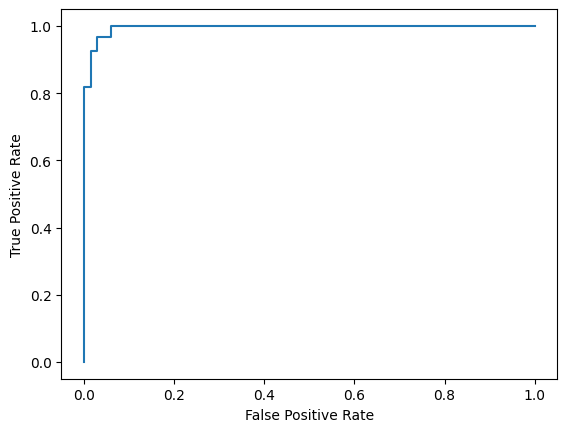

In [38]:
metrics.RocCurveDisplay(fpr=FPR,tpr=TPR).plot()

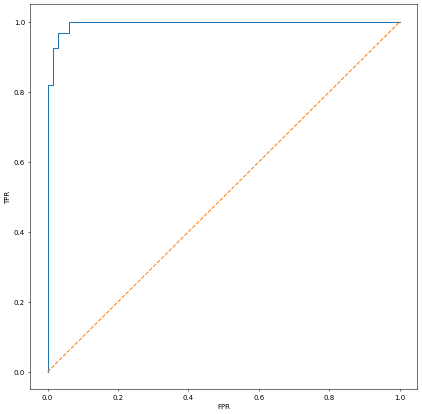

In [39]:
#绘制ROC曲线
plt.figure(figsize=(10,10),dpi=50)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--')
plt.show()